In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('HR_DS.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<h1>New Variables

<p><strong>1. Career Progression rate:<p>
(JobLevel)/(TotalWorkingYears+1)(JobLevel)/(TotalWorkingYears+1) (Adding 1 to avoid division by zero). This will help understand how fast an employee is progressing in their career within the organization.

In [3]:
df['Career_Progression_Rate'] = df['JobLevel'] / (df['TotalWorkingYears'] + 1).round(2)
df['Career_Progression_Rate'] = df['Career_Progression_Rate'].apply(lambda x: round(x, 2))

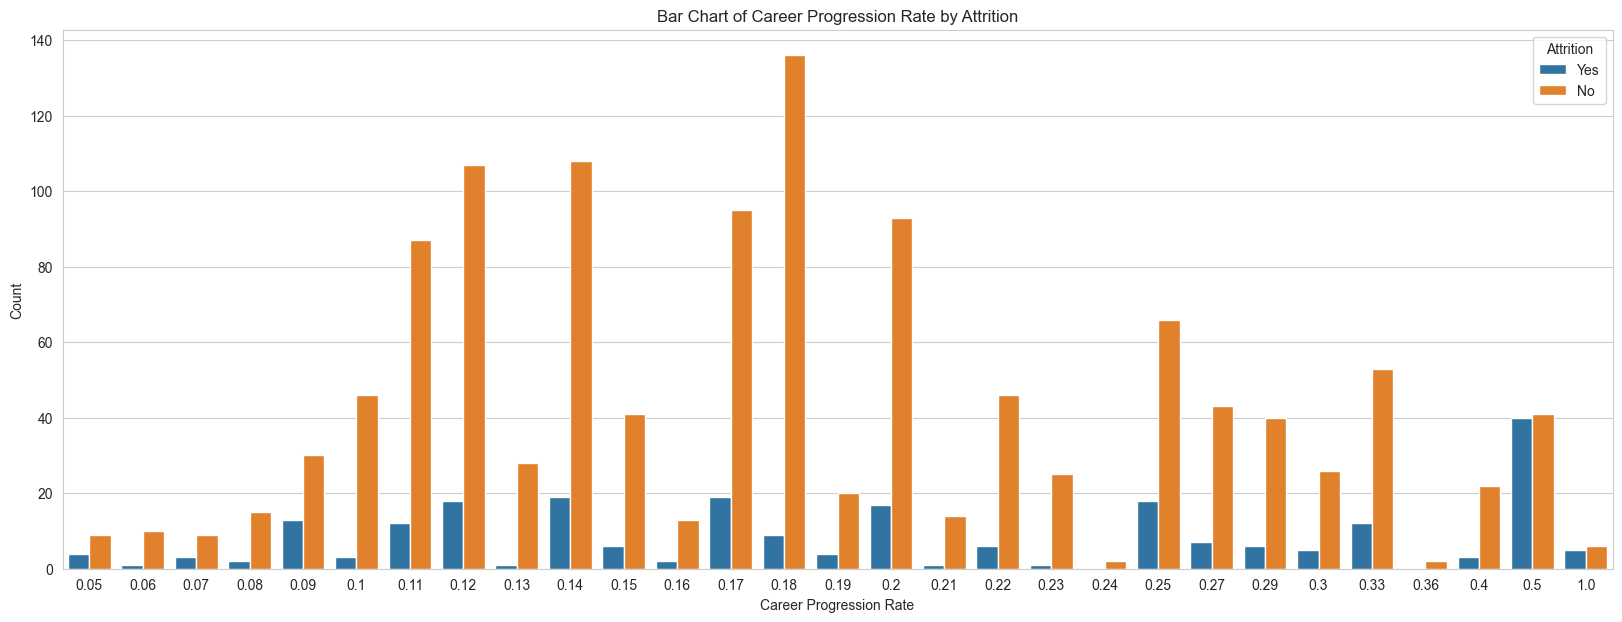

In [12]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Career_Progression_Rate', hue='Attrition')

plt.xlabel('Career Progression Rate')
plt.ylabel('Count')
plt.title('Bar Chart of Career Progression Rate by Attrition')

plt.legend(title='Attrition')
plt.show()

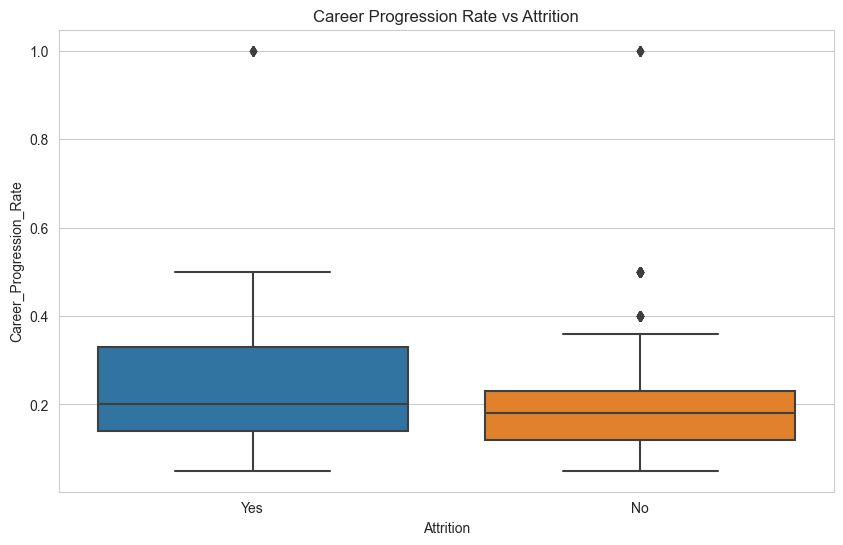

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Career_Progression_Rate', data=df)
plt.title('Career Progression Rate vs Attrition')
plt.show()

<p><strong>2. Years at the Company Ratio:<p>
Ratio of YearsAtCompany to TotalWorkingYears: This will give an insight into the loyalty or tenure of an employee relative to their total working years.

In [13]:
df['YearsAtCompany_Ratio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
df['YearsAtCompany_Ratio'] = df['YearsAtCompany_Ratio'].apply(lambda x: round(x, 2))

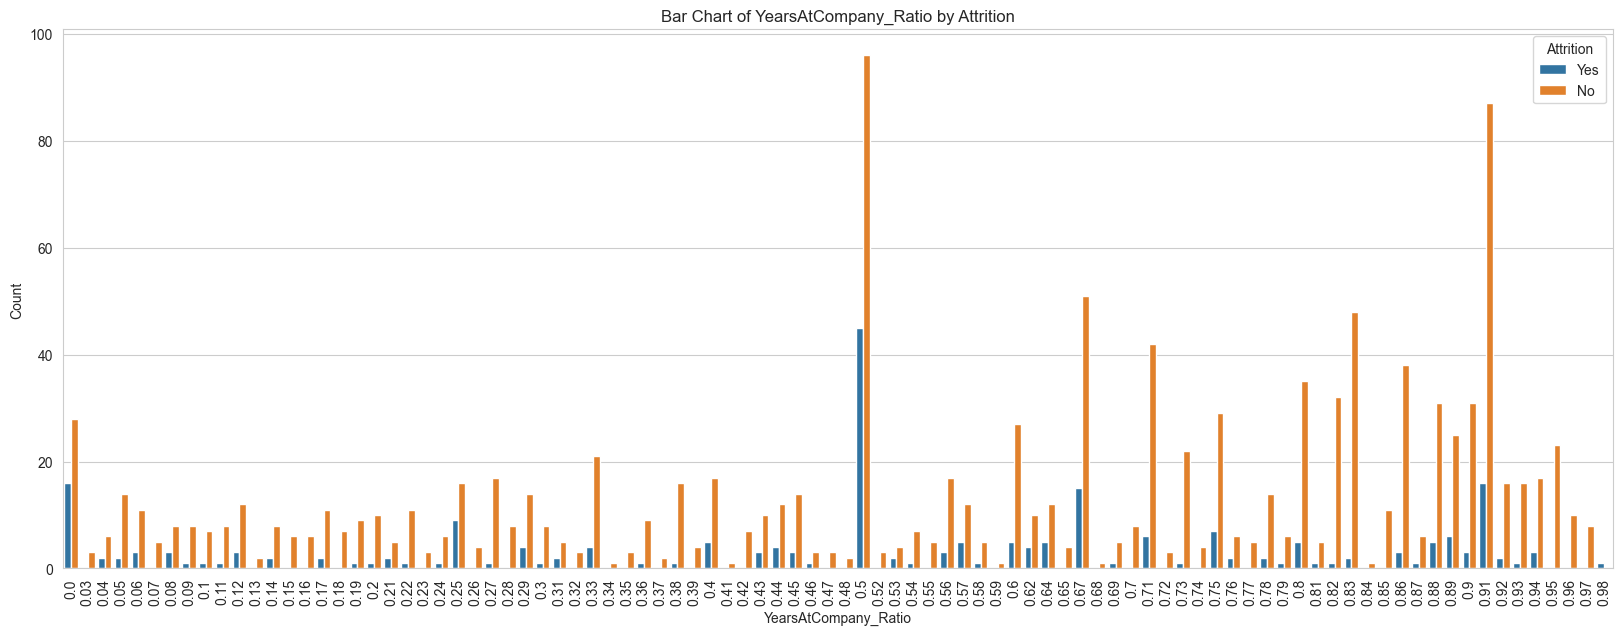

In [16]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='YearsAtCompany_Ratio', hue='Attrition')

plt.xlabel('YearsAtCompany_Ratio')
plt.ylabel('Count')
plt.title('Bar Chart of YearsAtCompany_Ratio by Attrition')

plt.legend(title='Attrition')
plt.xticks(rotation=90)
plt.show()

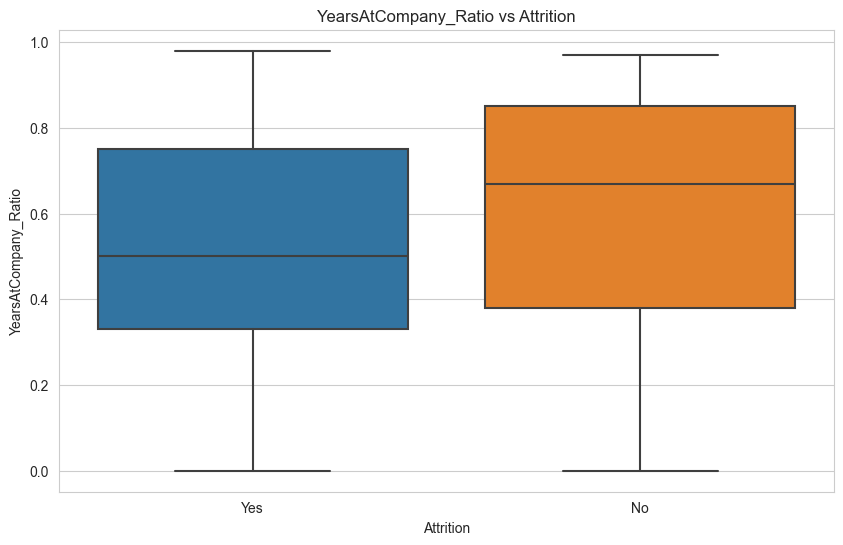

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany_Ratio', data=df)
plt.title('YearsAtCompany_Ratio vs Attrition')
plt.show()

<p><strong>3. Manager Change rate:<p>
YearsWithCurrManager/(YearsAtCompany+1)YearsWithCurrManager/(YearsAtCompany+1) - This could indicate the stability or change frequency of managerial relationships.

In [17]:
df['Manager_Change_Rate'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)
df['Manager_Change_Rate'] = df['Manager_Change_Rate'].apply(lambda x: round(x, 2))

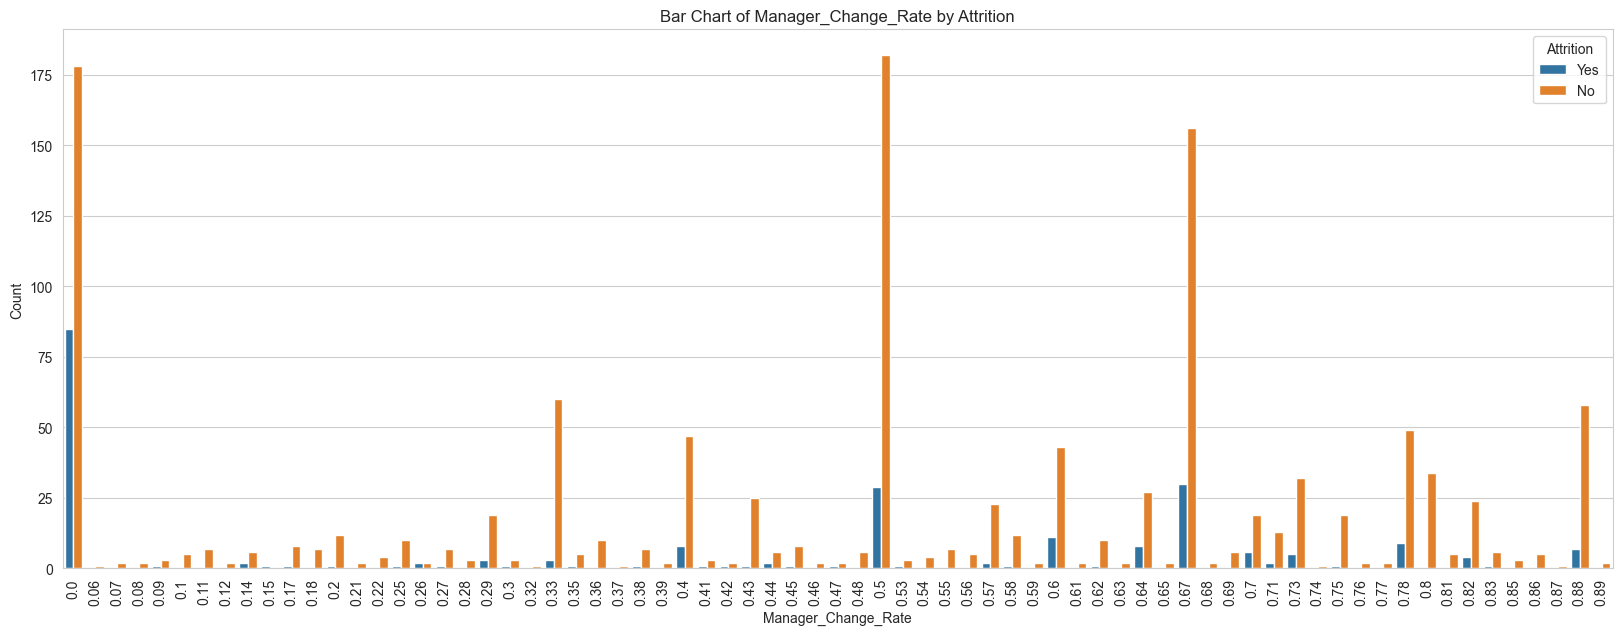

In [18]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Manager_Change_Rate', hue='Attrition')

plt.xlabel('Manager_Change_Rate')
plt.ylabel('Count')
plt.title('Bar Chart of Manager_Change_Rate by Attrition')

plt.legend(title='Attrition')
plt.xticks(rotation=90)
plt.show()

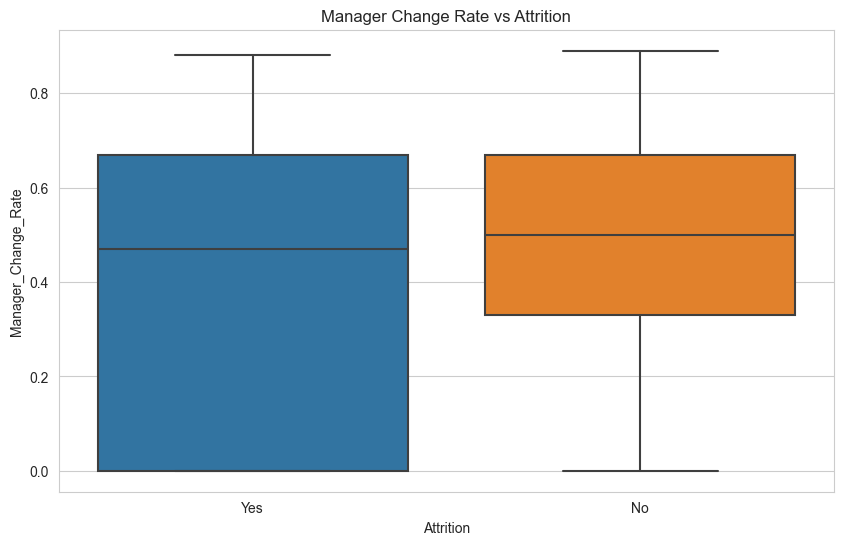

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Manager_Change_Rate', data=df)
plt.title('Manager Change Rate vs Attrition')
plt.show()